импорты

In [2]:
import os
import numpy as np
from natsort import natsorted
import matplotlib.pyplot as plt
import re
import pandas as pd
from scipy import signal

константы

In [ ]:
# 153.8336486816406250 884.2712384333286764    измеряемый диапазон. 0-2136 диапазон данных
start_nm = 475  # нм
end_nm = 700  # нм

x = pd.read_excel("x points nm.xlsx")
x = np.array(x["nm"].values[1 : len(x) - 1])


def nm_to_x(nm):
    return xint.index(nm) + 1


def x_to_nm(index):
    return x[index]


# номера точек в массиве по координате х
for i in range(len(x)):
    if x[i] > start_nm:
        start_x = i
        break
for i in range(len(x) - 1, 0, -1):
    if x[i] < end_nm:
        end_x = i
        break
x = x[start_x:end_x]
xint = list(np.array(x, dtype=int))
tail_x = nm_to_x(650)
head_x = nm_to_x(475)

функции получения данных

In [ ]:
def get_data_rmr(path):
    """получение всей папки в виде списка с массивами np"""
    _file_list = np.array(natsorted(os.listdir(path)))
    _data = []
    for file in range(len(_file_list)):
        with open(path + _file_list[file], "r", encoding="utf8") as spec:
            spec = re.split(",", spec.read())
            _data.append(np.array(spec[start_x:end_x], dtype=float))
    #    _data.append(get_rmr(spec))
    return _data

получение данных из rmr

In [ ]:
# получение всех спектров в виде списка в котором
# каждая строка - папка, а каждый элемент - массив np с спектром
data_row = []  # изанчальные графики
data = []  # сглаженные графики
smooth = True
main_folder = r"C:\Users\Nik\Desktop\tes\с2 points"
main_folder = main_folder.replace(chr(92), "/")
folders_list = list(natsorted(os.listdir(main_folder)))
print(main_folder)
print(folders_list)


for i in range(len(folders_list)):
    data_row.append(get_data_rmr(main_folder + "/" + folders_list[i] + "/"))
    print(folders_list[i], " recived ", len(data_row[i]))


if smooth == True:
    for i in range(len(data_row)):
        d = []
        for j in range(len(data_row[i])):
            d.append(signal.savgol_filter(data_row[i][j], 60, 3))
        data.append(d)
else:
    data = data_row.copy()
print("получено " + str(len(data_row)) + " папок")

добавить 1 папку

In [ ]:
data = []
data_row = []
folders_list = []

In [ ]:
# получение всех спектров в виде списка в котором
# каждая строка - папка, а каждый элемент - массив np с спектром
smooth = True
main_folder = r"C:\Users\Nik\Desktop\tes\с1 points"
main_folder = main_folder.replace(chr(92), "/")
folders_list = np.append(folders_list, main_folder[-8:])
print(main_folder)
print(folders_list)


data_row.append(get_data_rmr(main_folder + "/"))
# print("data from " + str(folders_list[i]) + " recived")
print("получено " + str(len(data_row)) + " папок")

if smooth == True:
    for i in range(len(data_row)):
        d = []
        for j in range(len(data_row[i])):
            d.append(signal.savgol_filter(data_row[i][j], 60, 3))
        data.append(d)
else:
    data = data_row.copy()

добавить папку с папками

In [ ]:
main_folder = r"C:\Users\Nik\Desktop\скрининг\points\p4"
main_folder = main_folder.replace(chr(92), "/")
_a = len(folders_list)
folders_list.extend(natsorted(os.listdir(main_folder)))

print(main_folder)
print(folders_list)

for i in range(_a, len(folders_list)):
    data_row.append(get_data_rmr(main_folder + "/" + folders_list[i] + "/"))
    print(folders_list[i], " recived ", len(data_row[i]))


if smooth == True:
    for i in range(_a, len(data_row)):
        d = []
        for j in range(len(data_row[i])):
            d.append(signal.savgol_filter(data_row[i][j], 60, 3))
        data.append(d)
else:
    data = data_row.copy()
print("получено " + str(len(data_row)) + " папок")

функции выборки максимума и разницы

In [ ]:
# функции для получения данных
def dmax(mas: np.array):
    return np.max(mas)


def dmax_650(mas: np.array):
    return np.max(mas) - mas[tail_x]


def dmax_list(mas: list):
    _max = []
    for a in mas:
        _max.append(np.max(a))
    return _max


def dmax_650_list(mas: list):
    _max = []
    for i in range(len(mas)):
        _max.append(np.max(mas[i]) - mas[i][tail_x])
    return _max

таймлайн

In [ ]:
def zero_index(mas):
    _zero = []
    for i in range(len(mas)):
        if np.max(mas[i]) < 0.1:
            _zero.append(i)
    return _zero

In [ ]:
_folder = 0
_a = 400
print_grafs = False
k = len(data[_folder])
if k > 800:
    k = 801
_num = 0
for _b in range(1, k, _a):

    if len(data[_folder]) < _b + _a:
        _a = len(data[_folder]) - _b
    _mas = data[_folder][_b : _b + _a]  # 100 cпектров из папки
    # for i in range(len(_mas)):
    #    _mas[i] = signal.savgol_filter(_mas[i], 60, 3)

    # plt.subplots(figsize=[10, 10]);plt.clf()
    fig, axs = plt.subplots(3, 1, figsize=(9, 5), dpi=150)

    # fig.tit title("синтез " + str(folders_list[_folder]))
    fig.suptitle(
        "Измерение " + str(folders_list[_folder]) + " " + str(_b) + "-" + str(_b + _a)
    )

    _sp = 0
    for i in range(len(_mas)):
        axs[0].plot(np.arange(_sp, _sp + len(_mas[i])), _mas[i], lw=1)
        _sp += len(_mas[i])
    # axs[0].set_ylim(-0.05, 0.5)
    axs[0].set_ylabel("Интенсивность, отн.ед.")
    # axs[0].set_xticklabels(np.arange(0,_sp),np.arange(0,30))
    # axs[0].axes.tick_params(axis='x',which='minor',direction='out',bottom=True,length=80)

    axs[1].set_ylabel("I(max), отн.ед.")
    minus = dmax_list(_mas)
    for i in range(len(_mas)):
        axs[1].scatter(i, minus[i], s=5)
    axs[1].plot(np.arange(len(minus)), minus, lw=0.2, color="black")

    axs[2].set_ylabel("I(max)-I(650), отн.ед.")
    minus = dmax_650_list(_mas)
    for i in range(len(_mas)):
        axs[2].scatter(i, minus[i], s=5)
    axs[2].plot(np.arange(len(minus)), minus, lw=0.2, color="black")
    if print_grafs == True:
        plt.savefig("timeline/" + str(folders_list[_folder]) + " " + str(_num) + ".png")
    _num += 1

# fig.clf();fig.clear()

выборка лучших спектров

In [ ]:
def data_for_hist(mas, ind):
    ar = np.zeros(len(mas))
    if ind == "max":
        for i in range(len(mas)):
            ar[i] = np.max(mas[i])
    else:
        for i in range(len(mas)):
            ar[i] = mas[i][ind]
    return ar


data_new = []
gap = 0.05
for n in range(len(folders_list)):
    masiv = data[n]
    massiv_row = data_row[n]
    _d = []
    ar_max = data_for_hist(masiv, "max")
    ar_mean = data_for_hist(masiv, tail_x)
    ar_max_mean = ar_max - ar_mean

    maximum = np.max(ar_max_mean)
    ar = []  # индексы спектров с наибольшей разницей между мах и 650
    for i in range(len(ar_max_mean)):
        if ar_max_mean[i] > maximum - gap:
            ar.append(i)
    # if len(ar) == 0:
    # continue
    ar2 = []  # значения интенсивнотей в точке max
    for i in range(len(ar)):
        ar2.append(np.max(masiv[ar[i]]))
    minimum = np.min(ar2)

    ar3 = []  # индексы более подходящих спектров
    for i in range(len(ar)):
        if np.max(masiv[ar[i]]) < minimum + gap:
            ar3.append(ar[i])
    for i in range(len(ar3)):
        _d.append(massiv_row[ar3[i]])
    data_new.append(_d)

In [ ]:
spec = []  # сглаженный
spec_row = []  # не сглаженный


for i in range(len(data_new)):
    _a = len(data_new[i])

    _b = np.sum(data_new[i], axis=0)

    _b /= _a

    spec.append(signal.savgol_filter(_b, 100, 3))
    spec_row.append(_b)

построение лучших спектров

In [ ]:
import matplotlib as mpl

In [ ]:
# построение красивых итоговых графиков
plt.figure(figsize=(12, 6))
k = 0
for n in range(len(spec)):
    plt.plot(
        x,
        spec[n],
        lw=0.3,
        label=str(folders_list[n])
        + " "
        + str(round(len(data_new[n]) * 100 / len(data[n]), 2))
        + "%",
    )
plt.xlabel("Длинна волны,нм")
plt.ylabel("Интенсивность, отн.ед.")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.savefig("отобранные графики 2.png")

In [ ]:
for n in range(len(spec)):
    plt.figure(figsize=(8, 6))
    plt.ioff()
    for i in range(len(data[n])):
        plt.plot(
            x,
            data[n][i],
            lw=0.1,
            color="black",
        )
    plt.plot(x, spec[n], color="red")
    plt.title(
        folders_list[n]
        + ", "
        + str(round(len(data_new[n]) * 100 / len(data[n]), 2))
        + "%"
    )
    plt.ylim(0, 1.3 * np.max(spec[n]))
    plt.xlabel("Длинна волны,нм")
    plt.ylabel("Интенсивность, отн.ед.")
    plt.savefig("sp2/" + str(folders_list[n]) + ".png")

дескрипторы

In [ ]:
def coef_parabola(sp):
    """коэффициенты параболы"""
    _m = np.max(sp)
    _gap = 0.005
    _i = np.argmax(sp)
    if _i == 0 or _i + 300 > len(sp):
        return [0]
    _p, _q = 0, 0
    for i in range(_i, _i + 300):
        if sp[i] < _m - _gap:
            _q = i
            break
    for i in range(_i, _i - 300, -1):
        if sp[i] < _m - _gap:
            _p = i

            break

    _coefs = np.polyfit(
        x[_p:_q], sp[_p:_q], 2
    )  # Вторым аргументом передается степень полинома
    return _coefs


def w_h_75(sp):
    """ширина, высота"""
    _h = np.max(sp) - (np.max(sp) - np.min(sp[0 : round(len(sp) / 3)])) * 0.25
    _start, _end = 0, 0
    _ind_max = np.argmax(sp)
    if _ind_max == 0 or _ind_max + 300 > len(sp):
        return [0, 0]
    for i in range(_ind_max, _ind_max + 300):
        if sp[i] <= _h:
            _end = i
            break
    for i in range(_ind_max, _ind_max - 300, -1):
        if sp[i] <= _h:
            _start = i
            break
    _w = x_to_nm(_end) - x_to_nm(_start)
    return (_w, _h)


def angle(sp, point):
    _x1 = x_to_nm(np.argmax(sp))
    _y1 = np.max(sp)
    _x2 = point
    _y2 = sp[nm_to_x(point)]
    return (_y2 - _y1) / (_x2 - _x1)

In [ ]:
# выбор максимума
S_name = pd.Series(folders_list)
S_Imax = pd.Series(name="I(max)")
S_NMmax = pd.Series(name="I nm")
S_I650 = pd.Series(name="I(650)")
S_Imax_m_I650 = pd.Series(name="I(max)-I(650)")
S_I400 = pd.Series(name="I(400)")
S_Imax_m_I400 = pd.Series(name="I(max)-I(400)")
S_coef_a = pd.Series(name="coef A")
S_height = pd.Series(name="height")
S_weight = pd.Series(name="weight")
S_angle = pd.Series(name="ang")
_sp = nm_to_x(475)
for i in range(len(spec)):
    S_Imax.loc[i] = np.max(spec[i])
    S_NMmax.loc[i] = x[np.argmax(spec[i])]
    S_I650.loc[i] = spec[i][tail_x]
    S_Imax_m_I650.loc[i] = S_Imax.loc[i] - S_I650.loc[i]
    S_I400.loc[i] = spec[i][_sp]
    S_Imax_m_I400.loc[i] = S_Imax.loc[i] / S_I400.loc[i]
    S_coef_a.loc[i] = coef_parabola(spec[i])[0]
    _w_h = w_h_75(spec[i])
    S_height.loc[i] = _w_h[0]
    S_weight.loc[i] = _w_h[1]
    S_angle.loc[i] = angle(spec[i], 570)

In [ ]:
# построение параболы и кучи линий
n = 0


ind = x_to_nm(np.argmax(spec[n]))
max = np.max(spec[n])


mean = spec[n][nm_to_x(650)]


plt.plot((ind, ind), (0, max), color="blue")
q = 0.75


def h(_max, _650, coe):
    return _max - coe * (_max - _650)


def o(sp):
    return np.max(sp) - (np.max(sp) - np.min(sp[0 : round(len(sp) / 3)])) * 0.25


parabola = np.poly1d(coef_parabola(spec[n]))


plt.title("измерение " + str(folders_list[n]))
plt.plot((400, 600), (max * q, max * q), label="0.75*I(max")
plt.plot((400, 600), (max * 0.5, max * 0.5), label="0.5*I(max")


plt.plot(
    (400, 600),
    (h(max, mean, 0.25), h(max, mean, 0.25)),
    label="0.75*I(max) вычет I(650)",
)
plt.plot((400, 600), (o(spec[n]), o(spec[n])), label="верхняя")


plt.plot(
    (400, 600), (h(max, mean, 0.5), h(max, mean, 0.5)), label="0.5*I(max) вычет I(650)"
)


plt.plot(x[100:500], parabola(x[100:500]), label="Аппроксимация")


plt.plot(x, spec[n], color="black")


plt.ylim(mean * 0.9, max * 1.1)


plt.legend()

построение карт

In [3]:
import sys

sys.path.append(r"C:\Users\Nik\Desktop\prog")
from pyfitit import *

In [ ]:
data_speed = pd.read_excel("speed2.xlsx")
data_measure = pd.concat(
    [
        S_Imax,
        S_NMmax,
        S_I650,
        S_Imax_m_I650,
        S_I400,
        S_Imax_m_I400,
        S_coef_a,
        S_height,
        S_weight,
        S_angle,
    ],
    axis=1,
)
data_table = pd.concat([data_speed, data_measure], axis=1)
print(data_table.columns[0:])

In [ ]:
data_table.to_excel("output2.xlsx", index=False)

In [ ]:
data_table = data_table.drop(10)
print(data_table)

In [ ]:
df = pd.read_csv("params copy.csv", sep="\t")

In [7]:
df = pd.read_excel("output all new.xlsx")

In [8]:
data_table = df
print(data_table)

     имя  v АК  v ХЗ  v ЦН  v M    I(max)     I nm    I(650)  I(max)-I(650)  \
0    0_1   0.5     1   1.1  3.4  0.238563  537.323  0.098820       0.139744   
1    0_7   0.5     1   0.8  3.7  0.263065  536.978  0.085576       0.177489   
2   0_12   0.5     1   1.4  3.1  0.260458  532.490  0.096496       0.163962   
3   0_14   0.5     1   0.5  4.0  0.266607  529.378  0.098647       0.167961   
4   1_18   0.6     1   1.1  3.3  0.212685  535.253  0.109598       0.103087   
5    1_1   0.7     1   1.4  2.9  0.194027  534.217  0.119349       0.074678   
6   1_17   0.7     1   0.6  3.7  0.245796  533.872  0.123726       0.122070   
7    0_2   0.8     1   0.8  3.4  0.199728  529.378  0.081684       0.118044   
8    0_6   0.8     1   1.1  3.1  0.274822  532.144  0.108172       0.166650   
9    0_8   0.8     1   1.4  2.8  0.224533  545.243  0.103121       0.121412   
10  0_11   0.8     1   0.5  3.7  0.248800  529.724  0.094621       0.154179   
11  1_12   0.8     1   1.2  3.0  0.200335  533.526  

In [ ]:
# data_table1["имя"] = data_table2["имя"].astype(str)
# sample = Sample(params=data_table, spectra=spec.pop(10), energy=x, meta=dict(nameColumn="имя"))

# sample.saveToFolder("sample")
descriptor.plot_cv_result(
    data_table,
    nameColumn=data_table.columns[0],
    features=["v АК", "v ЦН"],
    label_names=[
        "I(max)",
        "I nm",
        "I(650)",
        "I(max)-I(650)",
        "I(400)",
        "I(max)-I(400)",
        "coef A",
        "height",
        "weight",
        "ang",
    ],
    folder="results/1",
    cv_count=19,
    # repForStdCalc=1,
)

In [ ]:
print(data_table)

Try predict by: ['v АК', 'v ЦН']
I(max) - regression score: {'R2-score': 0.05854278769685628, 'MAE': 0.029955687428094947, 'MAX': 0.08334887777062785, 'RMSE': 0.03818162998325627, 'R2-score interval': array([-0.9062143 ,  0.53502516]), 'RMSE interval': array([0.03070525, 0.05050257]), 'MAE interval': array([0.02128345, 0.03862792])}+-{'R2-score': 0.0, 'MAE': 0.0, 'MAX': 0.0, 'RMSE': 0.0, 'R2-score interval': array([0., 0.]), 'RMSE interval': array([0., 0.]), 'MAE interval': array([0., 0.])}
I nm - regression score: {'R2-score': 0.38404834540366606, 'MAE': 2.937484374999997, 'MAX': 11.544249999999806, 'RMSE': 3.779024041191861, 'R2-score interval': array([-0.24714734,  0.6957886 ]), 'RMSE interval': array([3.03905022, 4.99848865]), 'MAE interval': array([2.06661142, 3.80835733])}+-{'R2-score': 0.0, 'MAE': 0.0, 'MAX': 0.0, 'RMSE': 0.0, 'R2-score interval': array([0., 0.]), 'RMSE interval': array([0., 0.]), 'MAE interval': array([0., 0.])}
I(650) - regression score: {'R2-score': -0.182128

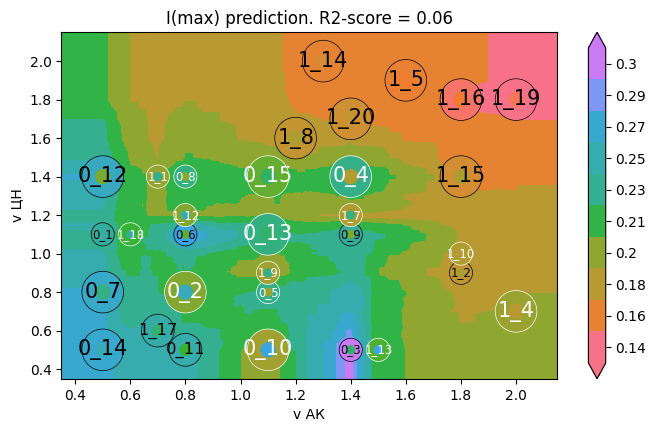

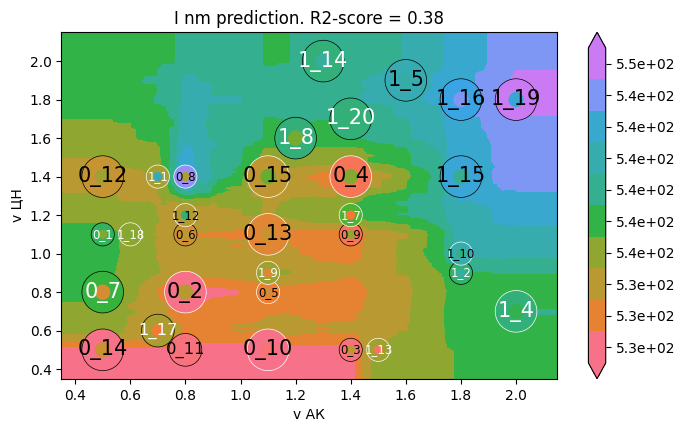

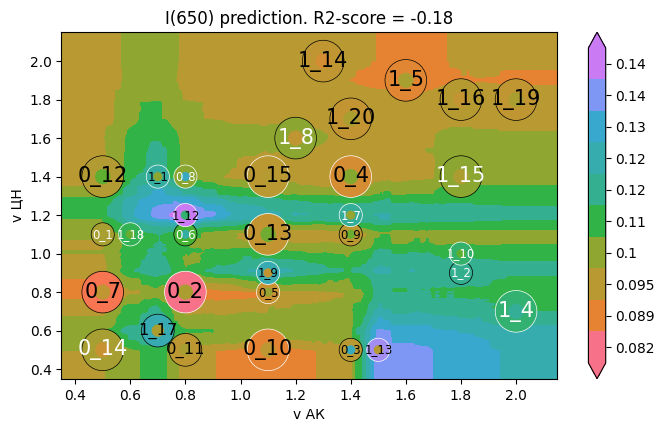

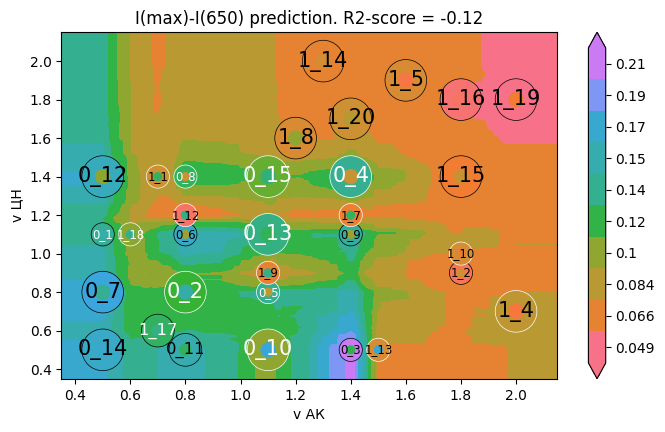

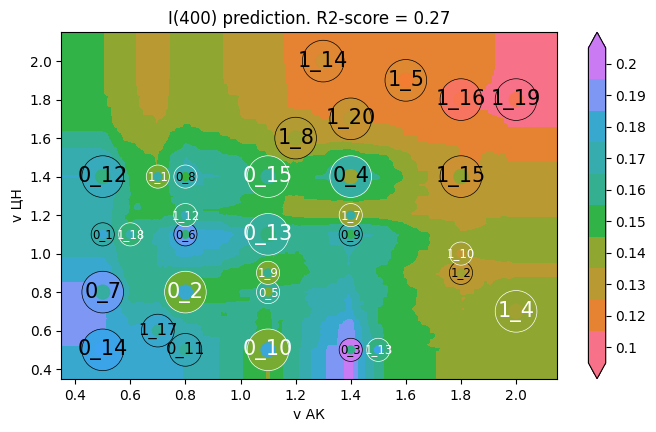

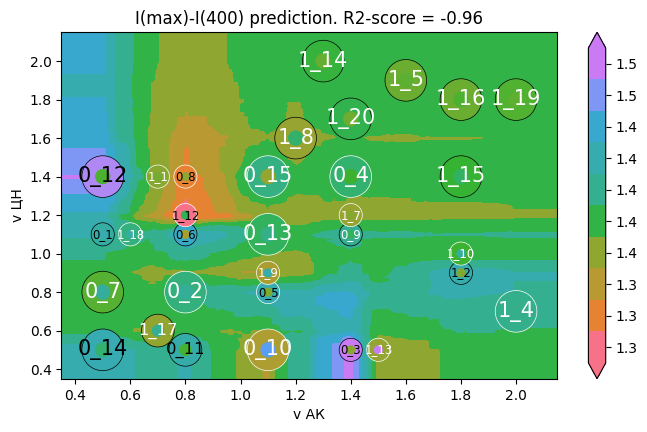

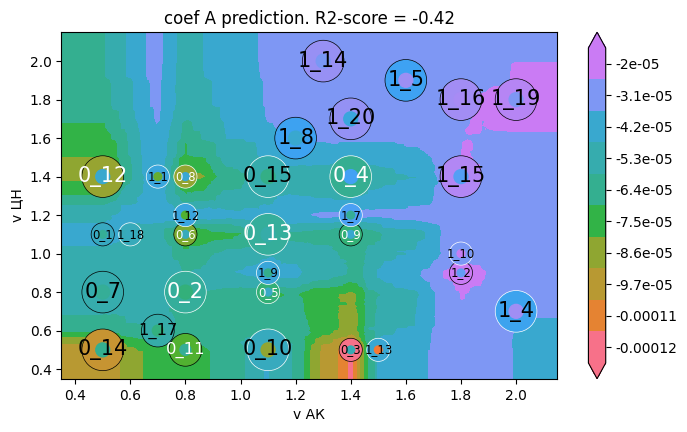

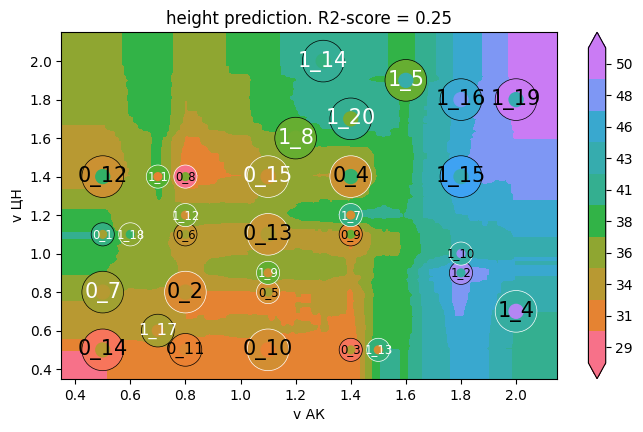

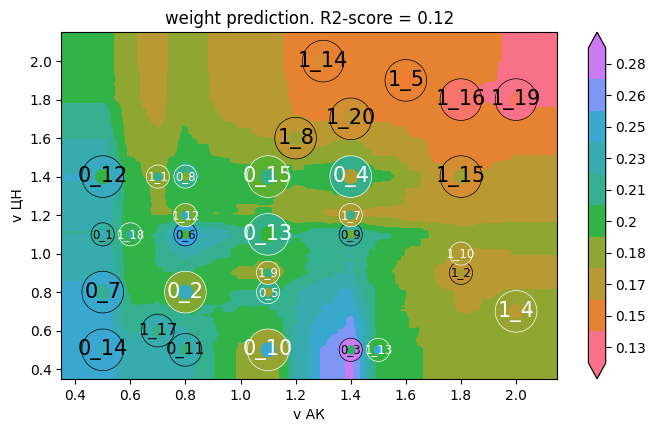

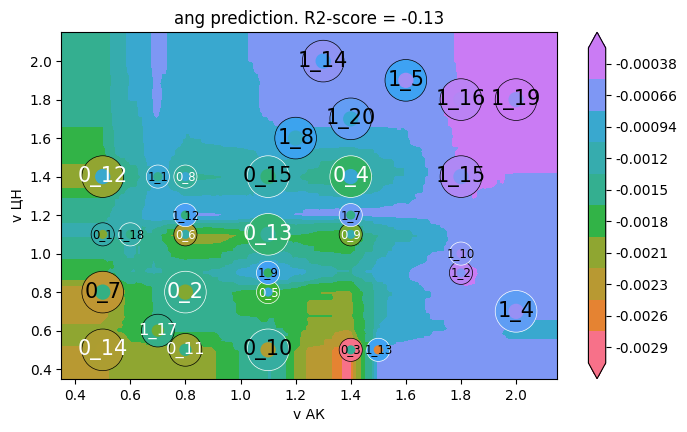

In [9]:
# 2D КАРТЫ
# import sklearn
data_table["имя"] = data_table["имя"].astype(str)
plotDescriptors2d(
    data_table,
    descriptorNames=["v АК", "v ЦН"],
    # labelNames=data_table.columns[5:],
    labelNames=[
        "I(max)",
        "I nm",
        "I(650)",
        "I(max)-I(650)",
        "I(400)",
        "I(max)-I(400)",
        "coef A",
        "height",
        "weight",
        "ang",
    ],
    textColumn=data_table.columns[0],
    cv_count=31,
    # unknown="unknown.params",
    folder_prefix="results/des5",
    # model_regr=sklearn.linear_model.RidgeCV(),
)